# Importovanje potrebnih paketa

In [1]:
#  import sys
#  !{sys.executable} -m pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Učitavanje i preprocesiranje dataseta

In [3]:
dataset = pd.read_csv("csgo_round_snapshots.csv")
dataset.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
print("Shape before cleaning:", dataset.shape)
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)
print("Shape after cleaning:", dataset.shape)

Shape before cleaning: (122410, 97)
Shape after cleaning: (122410, 97)


In [5]:
def clean(column_name):    
    """Make list from all values in column."""
    name = set()
    for name_string in dataset[column_name]:
        name.update(name_string.split(','))
    name = sorted(name)
    return name


def plot_column(column_name, n_elem_display=0):
    """ Plot the most frequently values in column."""

    name = clean(column_name)
    dummy_name = pd.DataFrame()
    for n in name:
        dummy_name[n] = [int(n in nm.split(',')) for nm in dataset[column_name]]

    namelist = [n for n in name]
    nlt = dummy_name[namelist].sum()
    nlt = nlt.sort_values(axis=0, ascending=False)
    if n_elem_display != 0:
        return nlt[:n_elem_display].plot(kind="bar", figsize=(10, 10))
    else:
        return nlt[:].plot(kind="bar", figsize=(10, 5))

<AxesSubplot:>

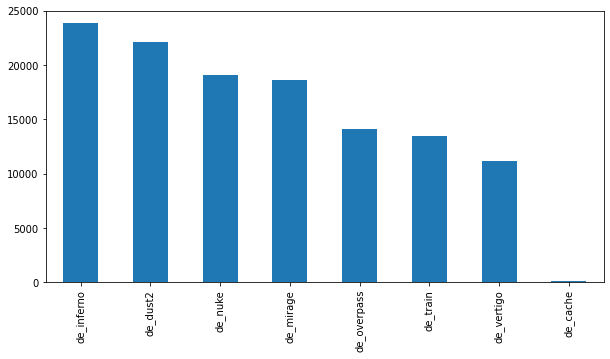

In [6]:
plot_column('map')

<AxesSubplot:>

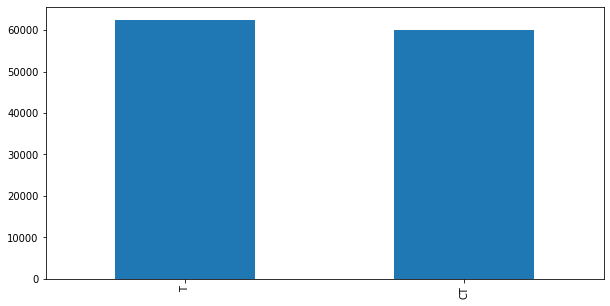

In [7]:
plot_column('round_winner')

In [8]:
dataset.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [9]:
dataset = pd.get_dummies(dataset,prefix=['map'], columns =['map'])

In [10]:
for i in range(dataset.shape[0]):
    if dataset['round_winner'][i] == 'CT':
        dataset['round_winner'][i] = 1
    else:
        dataset['round_winner'][i] = 0

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,False,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,1,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,False,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,1,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,False,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,False,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,1,0,1,0,0,0,0,0,0


In [12]:
dataset["bomb_planted"] = dataset["bomb_planted"].astype(int)

In [13]:
print(dataset["bomb_planted"].min())
print(dataset["bomb_planted"].max())

0
1


In [14]:
dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,175.00,0.0,0.0,0,500.0,500.0,0.0,0.0,4000.0,4000.0,...,0.0,1,0,1,0,0,0,0,0,0
1,156.03,0.0,0.0,0,500.0,500.0,400.0,300.0,600.0,650.0,...,0.0,1,0,1,0,0,0,0,0,0
2,96.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
3,76.03,0.0,0.0,0,391.0,400.0,294.0,200.0,750.0,500.0,...,0.0,1,0,1,0,0,0,0,0,0
4,174.97,1.0,0.0,0,500.0,500.0,192.0,0.0,18350.0,10750.0,...,0.0,1,0,1,0,0,0,0,0,0


In [15]:
X = dataset.drop('round_winner', axis=1)
y = dataset['round_winner']
print(X.shape)
print(y.shape)

(122410, 103)
(122410,)


## Eksperimenti pre normalizacije podataka

In [16]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (103,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history=model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97472/97928 [============================>.] - ETA: 0s - loss: 1.3350 - accuracy: 0.5901

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


97928/97928 [==============================] - 4s 38us/sample - loss: 1.3316 - accuracy: 0.5904 - val_loss: 0.6124 - val_accuracy: 0.6702
Epoch 2/10
97928/97928 [==============================] - 3s 35us/sample - loss: 0.5660 - accuracy: 0.7105 - val_loss: 0.5504 - val_accuracy: 0.7116
Epoch 3/10
97928/97928 [==============================] - 4s 37us/sample - loss: 0.5499 - accuracy: 0.7154 - val_loss: 0.5181 - val_accuracy: 0.7188
Epoch 4/10
97928/97928 [==============================] - 4s 38us/sample - loss: 0.5289 - accuracy: 0.7228 - val_loss: 0.4959 - val_accuracy: 0.7345
Epoch 5/10
97928/97928 [==============================] - 4s 37us/sample - loss: 0.5111 - accuracy: 0.7301 - val_loss: 0.5161 - val_accuracy: 0.7101
Epoch 6/10
97928/97928 [==============================] - 4s 37us/sample - loss: 0.5015 - accuracy: 0.7346 - val_loss: 0.4864 - val_accuracy: 0.7366
Epoch 7/10
97928/97928 [==============================] - 4s 37us/sample - loss: 0.4978 - accuracy: 0.7337 - val_loss

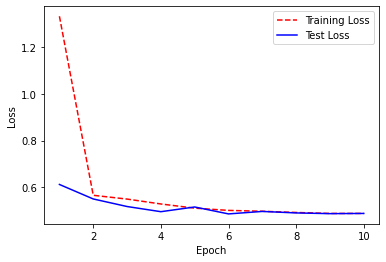

In [18]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [19]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape = (103,) ))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history=model1.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 4s 41us/sample - loss: 3.1445 - accuracy: 0.6670 - val_loss: 0.7937 - val_accuracy: 0.6731
Epoch 2/10
97928/97928 [==============================] - 4s 40us/sample - loss: 0.6282 - accuracy: 0.7068 - val_loss: 0.6011 - val_accuracy: 0.6629
Epoch 3/10
97928/97928 [==============================] - 4s 41us/sample - loss: 0.5341 - accuracy: 0.7226 - val_loss: 0.5673 - val_accuracy: 0.6920
Epoch 4/10
97928/97928 [==============================] - 4s 41us/sample - loss: 0.5144 - accuracy: 0.7293 - val_loss: 0.5256 - val_accuracy: 0.7222
Epoch 5/10
97928/97928 [==============================] - 4s 41us/sample - loss: 0.5001 - accuracy: 0.7349 - val_loss: 0.4993 - val_accuracy: 0.7287
Epoch 6/10
97928/97928 [==============================] - 4s 40us/sample - loss: 0.4931 - accuracy: 0.7380 - val_loss: 0.4863 - val_accuracy: 0.7330
Epoch 7/10
97928/97928 [==============================] 

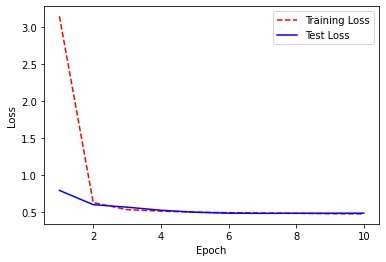

In [21]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [22]:
opt = keras.optimizers.Adam(learning_rate=0.001)

model2 = Sequential()
model2.add(Dense(1000, activation='relu', input_shape = (103,) ))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history=model2.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 4s 45us/sample - loss: 22.1812 - accuracy: 0.6749 - val_loss: 16.1531 - val_accuracy: 0.6977
Epoch 2/10
97928/97928 [==============================] - 5s 46us/sample - loss: 9.9196 - accuracy: 0.6851 - val_loss: 15.9387 - val_accuracy: 0.5860
Epoch 3/10
97928/97928 [==============================] - 5s 49us/sample - loss: 4.2557 - accuracy: 0.6887 - val_loss: 1.7784 - val_accuracy: 0.7057
Epoch 4/10
97928/97928 [==============================] - 4s 44us/sample - loss: 1.8361 - accuracy: 0.6971 - val_loss: 0.6675 - val_accuracy: 0.7337
Epoch 5/10
97928/97928 [==============================] - 4s 45us/sample - loss: 0.8290 - accuracy: 0.7110 - val_loss: 0.5080 - val_accuracy: 0.7292
Epoch 6/10
97928/97928 [==============================] - 5s 46us/sample - loss: 0.5315 - accuracy: 0.7305 - val_loss: 0.4981 - val_accuracy: 0.7309
Epoch 7/10
97928/97928 [=============================

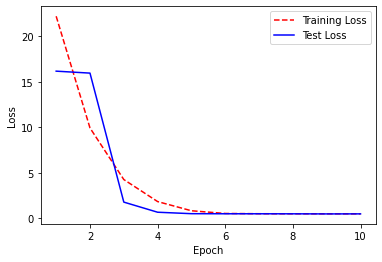

In [25]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [26]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model3 = Sequential()
model3.add(Dense(1000, activation='relu', input_shape = (103,) ))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model3.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 5s 50us/sample - loss: 7.7170 - accuracy: 0.6471 - val_loss: 1.1642 - val_accuracy: 0.6683
Epoch 2/10
97928/97928 [==============================] - 4s 43us/sample - loss: 1.0152 - accuracy: 0.6963 - val_loss: 1.1051 - val_accuracy: 0.6989
Epoch 3/10
97928/97928 [==============================] - 5s 50us/sample - loss: 0.8429 - accuracy: 0.7043 - val_loss: 0.7167 - val_accuracy: 0.6968
Epoch 4/10
97928/97928 [==============================] - 5s 47us/sample - loss: 0.7964 - accuracy: 0.7078 - val_loss: 0.8507 - val_accuracy: 0.6775
Epoch 5/10
97928/97928 [==============================] - 5s 49us/sample - loss: 0.7720 - accuracy: 0.7109 - val_loss: 0.6790 - val_accuracy: 0.6966
Epoch 6/10
97928/97928 [==============================] - 5s 49us/sample - loss: 0.7629 - accuracy: 0.7119 - val_loss: 0.6457 - val_accuracy: 0.7035
Epoch 7/10
97928/97928 [==============================] 

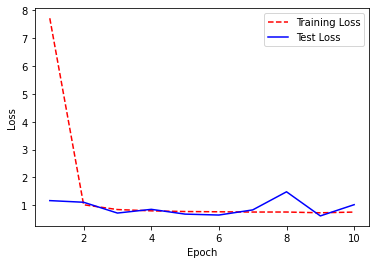

In [28]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [29]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model4 = Sequential()
model4.add(Dense(10000, activation='relu', input_shape = (103,) ))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model4.fit(X, y, epochs=100, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/100
97928/97928 [==============================] - 18s 188us/sample - loss: 1.4842 - accuracy: 0.6853 - val_loss: 9.2352 - val_accuracy: 0.5262
Epoch 2/100
97928/97928 [==============================] - 19s 190us/sample - loss: 1.3211 - accuracy: 0.6950 - val_loss: 1.5790 - val_accuracy: 0.6772
Epoch 3/100
97928/97928 [==============================] - 18s 186us/sample - loss: 1.2701 - accuracy: 0.7042 - val_loss: 1.2260 - val_accuracy: 0.6867
Epoch 4/100
97928/97928 [==============================] - 18s 188us/sample - loss: 1.2708 - accuracy: 0.7044 - val_loss: 1.1574 - val_accuracy: 0.6999
Epoch 5/100
97928/97928 [==============================] - 19s 193us/sample - loss: 1.2590 - accuracy: 0.7064 - val_loss: 1.2099 - val_accuracy: 0.6817
Epoch 6/100
97928/97928 [==============================] - 19s 196us/sample - loss: 1.1799 - accuracy: 0.7099 - val_loss: 0.9566 - val_accuracy: 0.7175
Epoch 7/100
97928/97928 [=============

97928/97928 [==============================] - 18s 183us/sample - loss: 1.1176 - accuracy: 0.7273 - val_loss: 0.6530 - val_accuracy: 0.7372
Epoch 55/100
97928/97928 [==============================] - 18s 183us/sample - loss: 1.1469 - accuracy: 0.7267 - val_loss: 0.9313 - val_accuracy: 0.7204
Epoch 56/100
97928/97928 [==============================] - 18s 183us/sample - loss: 1.1371 - accuracy: 0.7264 - val_loss: 2.5804 - val_accuracy: 0.6477
Epoch 57/100
97928/97928 [==============================] - 18s 183us/sample - loss: 1.1901 - accuracy: 0.7226 - val_loss: 2.3777 - val_accuracy: 0.6510
Epoch 58/100
97928/97928 [==============================] - 19s 189us/sample - loss: 1.1745 - accuracy: 0.7263 - val_loss: 1.1605 - val_accuracy: 0.6907
Epoch 59/100
97928/97928 [==============================] - 18s 188us/sample - loss: 1.1528 - accuracy: 0.7276 - val_loss: 0.8353 - val_accuracy: 0.7002
Epoch 60/100
97928/97928 [==============================] - 18s 183us/sample - loss: 1.0969 - a

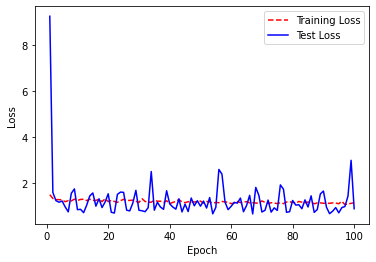

In [31]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Normalizacija podataka i novi eksperimenti

In [32]:
normalized_dataset=(dataset-dataset.min())/(dataset.max()-dataset.min()) - 0.5

In [33]:
normalized_dataset.head()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map_de_cache,map_de_dust2,map_de_inferno,map_de_mirage,map_de_nuke,map_de_overpass,map_de_train,map_de_vertigo
0,0.500000,-0.50000,-0.5,-0.5,0.500,0.333333,-0.500,-0.5,-0.450000,-0.450000,...,-0.5,0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
1,0.391594,-0.50000,-0.5,-0.5,0.500,0.333333,0.300,0.1,-0.492500,-0.491875,...,-0.5,0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
2,0.048717,-0.50000,-0.5,-0.5,0.282,0.166667,0.088,-0.1,-0.490625,-0.493750,...,-0.5,0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
3,-0.065575,-0.50000,-0.5,-0.5,0.282,0.166667,0.088,-0.1,-0.490625,-0.493750,...,-0.5,0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5
4,0.499829,-0.46875,-0.5,-0.5,0.500,0.333333,-0.116,-0.5,-0.270625,-0.365625,...,-0.5,0.5,-0.5,0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5


In [34]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape = (103,) ))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97536/97928 [============================>.] - ETA: 0s - loss: 3.5592 - accuracy: 0.6619

c:\users\admin200918\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


97928/97928 [==============================] - 4s 37us/sample - loss: 3.5477 - accuracy: 0.6622 - val_loss: 0.7684 - val_accuracy: 0.7102
Epoch 2/10
97928/97928 [==============================] - 4s 36us/sample - loss: 0.8711 - accuracy: 0.6926 - val_loss: 0.6910 - val_accuracy: 0.6676
Epoch 3/10
97928/97928 [==============================] - 4s 36us/sample - loss: 0.5789 - accuracy: 0.7144 - val_loss: 0.5172 - val_accuracy: 0.7245
Epoch 4/10
97928/97928 [==============================] - 4s 36us/sample - loss: 0.5407 - accuracy: 0.7131 - val_loss: 0.5172 - val_accuracy: 0.7203
Epoch 5/10
97928/97928 [==============================] - 4s 36us/sample - loss: 0.5345 - accuracy: 0.7131 - val_loss: 0.5281 - val_accuracy: 0.7249
Epoch 6/10
97928/97928 [==============================] - 4s 36us/sample - loss: 0.5197 - accuracy: 0.7291 - val_loss: 0.5993 - val_accuracy: 0.6835
Epoch 7/10
97928/97928 [==============================] - 4s 36us/sample - loss: 0.5294 - accuracy: 0.7209 - val_loss

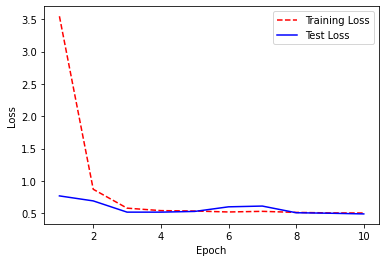

In [36]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [37]:
opt = keras.optimizers.Adam(learning_rate=0.00001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
history=model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 17s 172us/sample - loss: 17.3276 - accuracy: 0.6615 - val_loss: 0.8601 - val_accuracy: 0.6954
Epoch 2/10
97928/97928 [==============================] - 17s 173us/sample - loss: 0.9466 - accuracy: 0.6968 - val_loss: 0.9593 - val_accuracy: 0.6673
Epoch 3/10
97928/97928 [==============================] - 16s 167us/sample - loss: 0.8156 - accuracy: 0.7024 - val_loss: 0.8377 - val_accuracy: 0.7133
Epoch 4/10
97928/97928 [==============================] - 17s 170us/sample - loss: 0.7652 - accuracy: 0.7084 - val_loss: 1.0484 - val_accuracy: 0.6589
Epoch 5/10
97928/97928 [==============================] - 16s 167us/sample - loss: 0.7292 - accuracy: 0.7127 - val_loss: 0.6416 - val_accuracy: 0.7136
Epoch 6/10
97928/97928 [==============================] - 16s 159us/sample - loss: 0.7462 - accuracy: 0.7119 - val_loss: 0.6485 - val_accuracy: 0.6972
Epoch 7/10
97928/97928 [===================

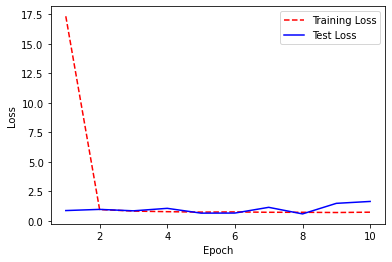

In [39]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [40]:
opt = keras.optimizers.Adam(learning_rate=0.0001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history=model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 15s 154us/sample - loss: 5.6733 - accuracy: 0.6793 - val_loss: 1.8905 - val_accuracy: 0.7092
Epoch 2/10
97928/97928 [==============================] - 15s 149us/sample - loss: 3.3389 - accuracy: 0.6889 - val_loss: 1.9411 - val_accuracy: 0.6893
Epoch 3/10
97928/97928 [==============================] - 14s 147us/sample - loss: 3.5882 - accuracy: 0.6904 - val_loss: 3.4637 - val_accuracy: 0.6579
Epoch 4/10
97928/97928 [==============================] - 14s 147us/sample - loss: 3.3007 - accuracy: 0.6939 - val_loss: 5.6462 - val_accuracy: 0.6754
Epoch 5/10
97928/97928 [==============================] - 15s 157us/sample - loss: 3.3262 - accuracy: 0.6953 - val_loss: 2.1711 - val_accuracy: 0.7062
Epoch 6/10
97928/97928 [==============================] - 17s 176us/sample - loss: 3.0254 - accuracy: 0.6976 - val_loss: 3.5104 - val_accuracy: 0.7026
Epoch 7/10
97928/97928 [====================

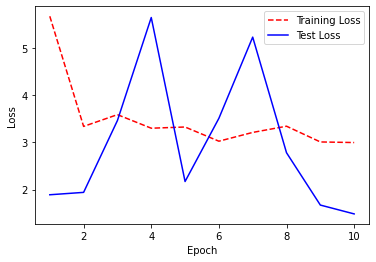

In [42]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [43]:
opt = keras.optimizers.Adam(learning_rate=0.000001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split = .2)

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 15s 152us/sample - loss: 12.5323 - accuracy: 0.6048 - val_loss: 3.0700 - val_accuracy: 0.6316
Epoch 2/10
97928/97928 [==============================] - 11s 117us/sample - loss: 2.3217 - accuracy: 0.6665 - val_loss: 1.9608 - val_accuracy: 0.6645
Epoch 3/10
97928/97928 [==============================] - 15s 157us/sample - loss: 1.7219 - accuracy: 0.6809 - val_loss: 1.5838 - val_accuracy: 0.6734
Epoch 4/10
97928/97928 [==============================] - 16s 164us/sample - loss: 1.4420 - accuracy: 0.6867 - val_loss: 1.3506 - val_accuracy: 0.6850
Epoch 5/10
97928/97928 [==============================] - 12s 127us/sample - loss: 1.2406 - accuracy: 0.6921 - val_loss: 1.1652 - val_accuracy: 0.6804
Epoch 6/10
97928/97928 [==============================] - 16s 168us/sample - loss: 1.0867 - accuracy: 0.6926 - val_loss: 1.0195 - val_accuracy: 0.6828
Epoch 7/10
97928/97928 [===================

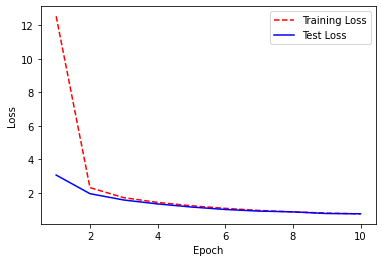

In [45]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [46]:
opt = keras.optimizers.Adam(learning_rate=0.00001)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.00000001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
history=model.fit(X, y, epochs=100, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

Train on 97928 samples, validate on 24482 samples
Epoch 1/100
97928/97928 [==============================] - 12s 122us/sample - loss: 3.6574 - accuracy: 0.6951 - val_loss: 0.8070 - val_accuracy: 0.7062
Epoch 2/100
97928/97928 [==============================] - 15s 155us/sample - loss: 0.8465 - accuracy: 0.7032 - val_loss: 0.8228 - val_accuracy: 0.7086
Epoch 3/100
97928/97928 [==============================] - 15s 157us/sample - loss: 0.7516 - accuracy: 0.7082 - val_loss: 0.7739 - val_accuracy: 0.6837
Epoch 4/100
97928/97928 [==============================] - 16s 160us/sample - loss: 0.7324 - accuracy: 0.7112 - val_loss: 0.6679 - val_accuracy: 0.7155
Epoch 5/100
97928/97928 [==============================] - 16s 161us/sample - loss: 0.7232 - accuracy: 0.7147 - val_loss: 0.8220 - val_accuracy: 0.7064
Epoch 6/100
97928/97928 [==============================] - 17s 175us/sample - loss: 0.7472 - accuracy: 0.7130 - val_loss: 0.5436 - val_accuracy: 0.7277
Epoch 7/100
97928/97928 [=============

97928/97928 [==============================] - 20s 205us/sample - loss: 0.4842 - accuracy: 0.7554 - val_loss: 0.5118 - val_accuracy: 0.7330
Epoch 55/100
97928/97928 [==============================] - 22s 222us/sample - loss: 0.4861 - accuracy: 0.7555 - val_loss: 0.6145 - val_accuracy: 0.7056
Epoch 56/100
97928/97928 [==============================] - 21s 210us/sample - loss: 0.4899 - accuracy: 0.7548 - val_loss: 0.5402 - val_accuracy: 0.7242
Epoch 57/100
97928/97928 [==============================] - 20s 206us/sample - loss: 0.4845 - accuracy: 0.7564 - val_loss: 0.5168 - val_accuracy: 0.7290
Epoch 58/100
97928/97928 [==============================] - 20s 206us/sample - loss: 0.4803 - accuracy: 0.7566 - val_loss: 0.5043 - val_accuracy: 0.7370
Epoch 59/100
97928/97928 [==============================] - 19s 197us/sample - loss: 0.4854 - accuracy: 0.7559 - val_loss: 0.5042 - val_accuracy: 0.7312
Epoch 60/100
97928/97928 [==============================] - 21s 213us/sample - loss: 0.4864 - a

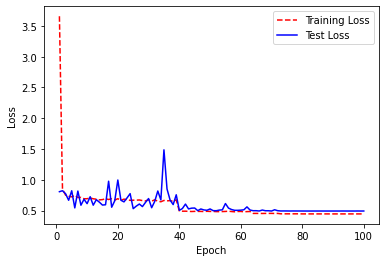

In [48]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [49]:
opt = keras.optimizers.Adam(learning_rate=0.00001)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,verbose = 1,
                              patience=5, min_lr=0.00000001)

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape = (103,) ))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

Train on 97928 samples, validate on 24482 samples
Epoch 1/100
97928/97928 [==============================] - 37s 375us/sample - loss: 2.0792 - accuracy: 0.6548 - val_loss: 1.1693 - val_accuracy: 0.6963
Epoch 2/100
97928/97928 [==============================] - 37s 376us/sample - loss: 1.5610 - accuracy: 0.6830 - val_loss: 1.8402 - val_accuracy: 0.6822
Epoch 3/100
97928/97928 [==============================] - 37s 379us/sample - loss: 1.5649 - accuracy: 0.6866 - val_loss: 1.6242 - val_accuracy: 0.6630
Epoch 4/100
97928/97928 [==============================] - 37s 380us/sample - loss: 1.3233 - accuracy: 0.6916 - val_loss: 1.3971 - val_accuracy: 0.6660
Epoch 5/100
97928/97928 [==============================] - 42s 424us/sample - loss: 1.3596 - accuracy: 0.6919 - val_loss: 1.4874 - val_accuracy: 0.6624
Epoch 6/100
97928/97928 [==============================] - 35s 361us/sample - loss: 1.2401 - accuracy: 0.6971 - val_loss: 0.9820 - val_accuracy: 0.6943
Epoch 7/100
97928/97928 [=============

97928/97928 [==============================] - 38s 385us/sample - loss: 0.5099 - accuracy: 0.7437 - val_loss: 0.5922 - val_accuracy: 0.6985
Epoch 55/100
97928/97928 [==============================] - 38s 393us/sample - loss: 0.5148 - accuracy: 0.7429 - val_loss: 0.5400 - val_accuracy: 0.7240
Epoch 56/100
97928/97928 [==============================] - 38s 389us/sample - loss: 0.5180 - accuracy: 0.7425 - val_loss: 0.5250 - val_accuracy: 0.7098
Epoch 57/100
97928/97928 [==============================] - 42s 431us/sample - loss: 0.5084 - accuracy: 0.7436 - val_loss: 0.5004 - val_accuracy: 0.7262
Epoch 58/100
97928/97928 [==============================] - 42s 425us/sample - loss: 0.5101 - accuracy: 0.7440 - val_loss: 0.4963 - val_accuracy: 0.7378
Epoch 59/100
97928/97928 [==============================] - 38s 391us/sample - loss: 0.5086 - accuracy: 0.7427 - val_loss: 0.4919 - val_accuracy: 0.7349
Epoch 60/100
97928/97928 [==============================] - 40s 411us/sample - loss: 0.5045 - a

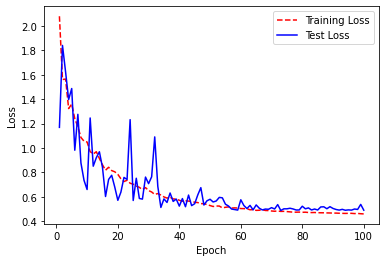

In [51]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [52]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,verbose = 1,
                              patience=5, min_lr=0.00000001)

model = Sequential()
model.add(Dense(1024, activation='relu', input_shape = (103,) ))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
history = model.fit(X, y, epochs=100, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

Train on 97928 samples, validate on 24482 samples
Epoch 1/100
97928/97928 [==============================] - 16s 168us/sample - loss: 4.1980 - accuracy: 0.6484 - val_loss: 2.0148 - val_accuracy: 0.6106
Epoch 2/100
97928/97928 [==============================] - 16s 168us/sample - loss: 1.1269 - accuracy: 0.6795 - val_loss: 0.6359 - val_accuracy: 0.7048
Epoch 3/100
97928/97928 [==============================] - 17s 170us/sample - loss: 0.6823 - accuracy: 0.6981 - val_loss: 0.5188 - val_accuracy: 0.7077
Epoch 4/100
97928/97928 [==============================] - 16s 167us/sample - loss: 0.5580 - accuracy: 0.7162 - val_loss: 0.6290 - val_accuracy: 0.6746
Epoch 5/100
97928/97928 [==============================] - 17s 170us/sample - loss: 0.5371 - accuracy: 0.7220 - val_loss: 0.5794 - val_accuracy: 0.6872
Epoch 6/100
97928/97928 [==============================] - 17s 169us/sample - loss: 0.5364 - accuracy: 0.7266 - val_loss: 0.5624 - val_accuracy: 0.6854
Epoch 7/100
97928/97928 [=============

97928/97928 [==============================] - 16s 163us/sample - loss: 0.4498 - accuracy: 0.7584 - val_loss: 0.4705 - val_accuracy: 0.7432
Epoch 55/100
97928/97928 [==============================] - 16s 162us/sample - loss: 0.4497 - accuracy: 0.7588 - val_loss: 0.4733 - val_accuracy: 0.7334
Epoch 56/100
97928/97928 [==============================] - 16s 163us/sample - loss: 0.4497 - accuracy: 0.7582 - val_loss: 0.4772 - val_accuracy: 0.7385
Epoch 57/100
97928/97928 [==============================] - 17s 169us/sample - loss: 0.4499 - accuracy: 0.7577 - val_loss: 0.4684 - val_accuracy: 0.7441
Epoch 58/100
97928/97928 [==============================] - 16s 168us/sample - loss: 0.4483 - accuracy: 0.7584 - val_loss: 0.4709 - val_accuracy: 0.7419
Epoch 59/100
97928/97928 [==============================] - 16s 165us/sample - loss: 0.4483 - accuracy: 0.7593 - val_loss: 0.4898 - val_accuracy: 0.7427
Epoch 60/100
97928/97928 [==============================] - 16s 167us/sample - loss: 0.4484 - a

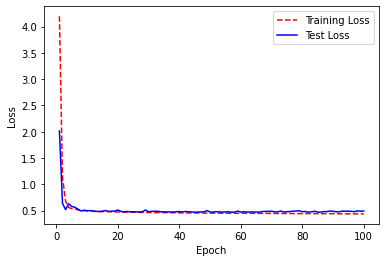

In [54]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

## Druge loss funkcije

In [55]:
opt = keras.optimizers.Adam(learning_rate=0.000001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='hinge', metrics=['accuracy'])

In [56]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 6s 62us/sample - loss: 1.0000 - accuracy: 0.5116 - val_loss: 1.0000 - val_accuracy: 0.5027
Epoch 2/10
97928/97928 [==============================] - 6s 58us/sample - loss: 1.0000 - accuracy: 0.5116 - val_loss: 1.0000 - val_accuracy: 0.5027
Epoch 3/10
97928/97928 [==============================] - 6s 59us/sample - loss: 1.0000 - accuracy: 0.5116 - val_loss: 1.0000 - val_accuracy: 0.5027
Epoch 4/10
97928/97928 [==============================] - 6s 59us/sample - loss: 1.0000 - accuracy: 0.5116 - val_loss: 0.9998 - val_accuracy: 0.5029
Epoch 5/10
97928/97928 [==============================] - 6s 60us/sample - loss: 0.9998 - accuracy: 0.5117 - val_loss: 0.9999 - val_accuracy: 0.5027
Epoch 6/10
97928/97928 [==============================] - 6s 59us/sample - loss: 0.9722 - accuracy: 0.5394 - val_loss: 0.9509 - val_accuracy: 0.5522
Epoch 7/10
97928/97928 [==============================] 

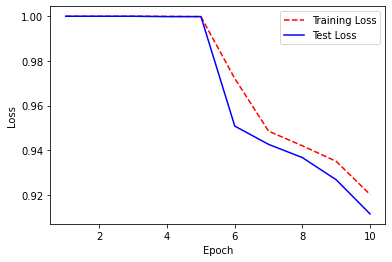

In [57]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [58]:
opt = keras.optimizers.Adam(learning_rate=0.000001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer=opt, loss='hinge', metrics=['accuracy'])

In [59]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 6s 66us/sample - loss: 1.0213 - accuracy: 0.4894 - val_loss: 1.0164 - val_accuracy: 0.4916
Epoch 2/10
97928/97928 [==============================] - 6s 61us/sample - loss: 1.0195 - accuracy: 0.4902 - val_loss: 1.0163 - val_accuracy: 0.4925
Epoch 3/10
97928/97928 [==============================] - 6s 60us/sample - loss: 1.0167 - accuracy: 0.4917 - val_loss: 1.0144 - val_accuracy: 0.4925
Epoch 4/10
97928/97928 [==============================] - 6s 60us/sample - loss: 1.0157 - accuracy: 0.4922 - val_loss: 1.0138 - val_accuracy: 0.4935
Epoch 5/10
97928/97928 [==============================] - 6s 61us/sample - loss: 1.0151 - accuracy: 0.4925 - val_loss: 1.0126 - val_accuracy: 0.4938
Epoch 6/10
97928/97928 [==============================] - 6s 60us/sample - loss: 1.0146 - accuracy: 0.4929 - val_loss: 1.0131 - val_accuracy: 0.4930
Epoch 7/10
97928/97928 [==============================] 

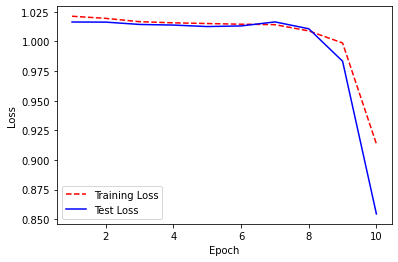

In [60]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [62]:
opt = keras.optimizers.Adam(learning_rate=0.000001)

model = Sequential()
model.add(Dense(1000, activation='relu', input_shape = (103,) ))
model.add(Dense(100,activation='relu'))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer=opt, loss='hinge', metrics=['accuracy'])

In [63]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

Train on 97928 samples, validate on 24482 samples
Epoch 1/10
97928/97928 [==============================] - 8s 77us/sample - loss: 0.8599 - accuracy: 0.5700 - val_loss: 0.8337 - val_accuracy: 0.5828
Epoch 2/10
97928/97928 [==============================] - 7s 71us/sample - loss: 0.8210 - accuracy: 0.5895 - val_loss: 0.8080 - val_accuracy: 0.5958
Epoch 3/10
97928/97928 [==============================] - 7s 75us/sample - loss: 0.7989 - accuracy: 0.6005 - val_loss: 0.7980 - val_accuracy: 0.6009
Epoch 4/10
97928/97928 [==============================] - 7s 75us/sample - loss: 0.7956 - accuracy: 0.6022 - val_loss: 0.8002 - val_accuracy: 0.6001
Epoch 5/10
97928/97928 [==============================] - 7s 75us/sample - loss: 0.7931 - accuracy: 0.6034 - val_loss: 0.7962 - val_accuracy: 0.6021
Epoch 6/10
97928/97928 [==============================] - 7s 73us/sample - loss: 0.7896 - accuracy: 0.6052 - val_loss: 0.7910 - val_accuracy: 0.6045
Epoch 7/10
97928/97928 [==============================] 

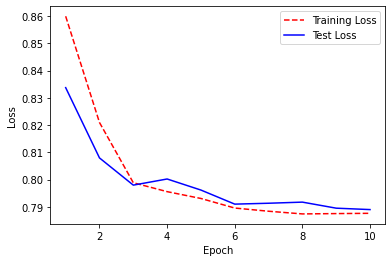

In [64]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Kompleksniji model sa vise slojeva

In [78]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,verbose = 1,
                              patience=5, min_lr=0.00000001)

model = Sequential()
model.add(Dense(8192, activation='relu', input_shape = (103,) ))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
model.fit(X, y, epochs=100, batch_size=32, validation_split = .2, callbacks=[reduce_lr])

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();